## Clean and Analyze Employee Exit Surveys

In this project, we'll play the role of a data analyst and pretend our stakeholders want to know the following:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer? <br>
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

## Summary

- Employee's with a longer tenure  are more likely to leave due to some kind of dissatisfaction
- 1 in 3 of job surveys in any age indicate some kind of dissatisfaction.
- Age is not a contributing factor of employee dissatisfaction
- DETE Survey data contains more dissatisfaction than TAFE data
- Both Survey data contains columns that aren't needed to answer the above questions

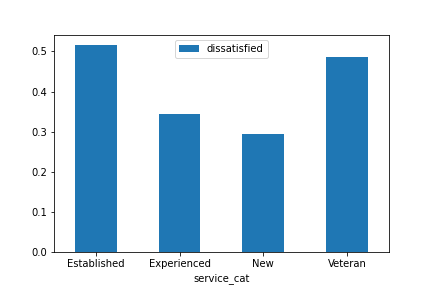

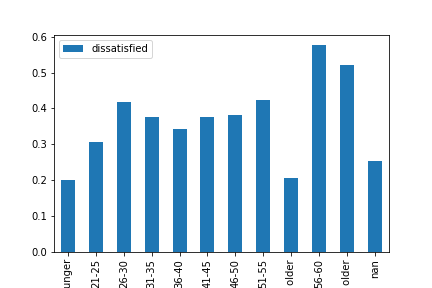

In [46]:
vis_cat = Image(filename='cat_plot.png')
vis_age = Image(filename='age_plot.png')
display(vis_cat, vis_age)

## Project
Datasets can be found here: <br>
https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey <br>
https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey

Let's start by reading in the dataset

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
from IPython.display import Image
from IPython.display import display
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [6]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


#### Observations:

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.


## Cleaning the datasets

Firstly, we are going to change up the pd read function to interpret 'Not Stated' string values as NaN
As well as drop columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.

In [7]:
#Change Not Stated strings to NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

#Drop Irrelevant DETE Columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

#Drop Irrelevant TAFE Columns
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [8]:
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [9]:
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


#### Updating column names
Each dataframe contains many of the same columns, but the column names are different. Because we eventually want to combine them, we'll have to standardize the column names.  Below we update the column names to make them easier to understand:

In [10]:
#Update DETE survey columns
dete_columns = dete_survey_updated.columns
dete_updated_columns = []
for each in dete_columns:
    column = each.strip().lower().replace(' ', '_')
    dete_updated_columns.append(column)

dete_survey_updated.columns = dete_updated_columns
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [11]:
#Update TAFE survey columns
mapping = {'Record ID':'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',
           'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 
           'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position',
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


#### Filtering resignation types

Recall that one of our questions is:
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. We'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In regards to the DETE survey, there are three resignation types.  We will have to account for each of these variations

In [12]:
#DETE survey: Filter separationtype with only Resignation
dete_index = dete_survey_updated['separationtype'].str.contains('Resignation')
dete_applied = dete_survey_updated[dete_index == True]
dete_resign_count = dete_applied['separationtype'].value_counts()

dete_resignations = dete_applied.copy()
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [13]:
#TAFE survey: Filter separationtype with only Resignation
tafe_index = tafe_survey_updated['separationtype'].str.contains('Resignation')
tafe_applied = tafe_survey_updated[tafe_index == True]
tafe_resign_count = tafe_applied['separationtype'].value_counts()

tafe_resignations = tafe_applied.copy()
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


#### Verify Years

In [14]:
#Check unique values in DETE
dete_resignations['cease_date'].value_counts()   

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [15]:
#Extract years and convert to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [16]:
#Check for unique values in DETE
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [17]:
#Check for unique values in TAFE
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

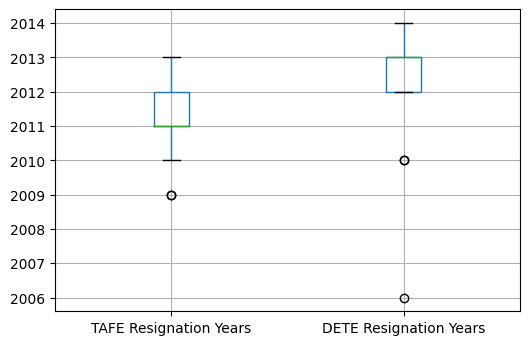

In [18]:
#Unique Years Visualized
a= tafe_resignations['cease_date']
b= dete_resignations['cease_date']
bppd = pd.concat((a.rename('TAFE Resignation Years'), b.rename('DETE Resignation Years')), axis=1)

bppd.boxplot()

#### Observations:
- The years in each dataframe do not span the same number of years.
- Judging by the series counts, there does not seem to be any issues with the years

#### Years of Service Column

The tafe_resignations dataframe already contains a column for years of service, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding years of service column in dete_resignations.

In [19]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


#### Dissatisfied Employees
Now that we have identified length of service, we will find any employees who resigned because they were dissatisfied.

In order to do so, the columns below are categorized as dissatisfaction:
1. tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction
2. dete_survey_updated:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If any of these factors are indicated, they will be marked under a new 'dissatisfied' column

In [20]:
# Used to iterate through the TAFE dataset to indicate true/false for new column
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

#Update TAFE dissatisfactory columns to booleans and added dissatisfied column
tafecol = tafe_resignations[['Contributing Factors. Dissatisfaction',
                           'Contributing Factors. Job Dissatisfaction']]
tafebool = tafecol.applymap(update_vals)
tafe_resignations['dissatisfied'] = tafebool.any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
print(tafe_resignations['dissatisfied'].value_counts())

False    241
True      91
Name: dissatisfied, dtype: int64


(0.0, 300.0)

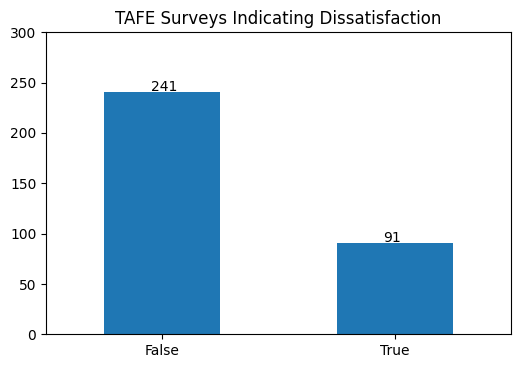

In [21]:
#TAFE Dissatisfaction Plot Automation Scenario: 
#Update bar chart in a dynamic dataset

tdisnum = tafe_resignations['dissatisfied'].astype(float).value_counts()

tdisnumtrue = tafe_resignations[tafe_resignations['dissatisfied'] == True]
tdisnumtrueplot = len(tdisnumtrue.index)

tdisnumfalse = tafe_resignations[tafe_resignations['dissatisfied'] == False]
tdisnumfalseplot = len(tdisnumfalse.index)

#Plot Visualized
ax = tdisnum.plot(kind = 'bar', title='TAFE Surveys Indicating Dissatisfaction')
ax.set_xticklabels(labels=['False','True'], rotation=0)
ax.text(-0.05, tdisnumfalseplot + 1, tdisnumfalseplot)
ax.text(0.95, tdisnumtrueplot + 1, tdisnumtrueplot)
ax.set_ylim(0, 300)

In [22]:
#Update DETE dissatisfactory columns to booleans and added dissatisfied column

detecol1 = dete_resignations.iloc[:,13:20]
detecol2 = dete_resignations.iloc[:,25:27]
detecol = pd.concat([detecol1, detecol2], axis=1)
dete_resignations['dissatisfied'] = detecol.any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

(0.0, 200.0)

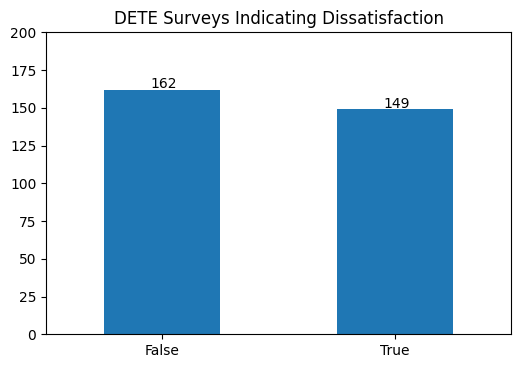

In [23]:
#DETE Dissatisfaction Plot Automation Scenario: 
#Update bar chart in a dynamic dataset

ddisnum = dete_resignations['dissatisfied'].astype(float).value_counts()

ddisnumtrue = dete_resignations[dete_resignations['dissatisfied'] == True]
ddisnumtrueplot = len(ddisnumtrue.index)

ddisnumfalse = dete_resignations[dete_resignations['dissatisfied'] == False]
ddisnumfalseplot = len(ddisnumfalse.index)

#Plot Visualized
ax2 = ddisnum.plot(kind = 'bar', title='DETE Surveys Indicating Dissatisfaction')
ax2.set_xticklabels(labels=['False','True'], rotation=0)
ax2.text(-0.05, ddisnumfalseplot + 1, ddisnumfalseplot)
ax2.text(0.95, ddisnumtrueplot + 1, ddisnumtrueplot)
ax2.set_ylim(0, 200)

## Combining the datasets
We're almost ready to analyze.  First however we will need to combine the datasets together. In order to distinguish between the two after concatting, we will add an 'institute' column to each set to indicate its origin.  Then, we will drop any columns that have less than 500 non-null values as they won't be used in our analysis.

In [24]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up])
combined_updated = combined.dropna(axis=1, thresh=500).copy()

#### Institute Service

The institute service is a tricky column because it contains values in various forms.  To analyze the data, we will convert these numbers into categories and base our analysis on this article:
https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage

TLDR; It is more effective to understand employee's needs according to career stage, instead of age. Therefore we will use the definitions below:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In order to convert the column to numbers, we will have to convert the column to string, and then extract the number value, convert it back to float, and then apply a function to map the categories to the value.

In [25]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


In [26]:
# Extract Years of Service, Convert to Float
years_string = combined_updated['institute_service'].astype(str).str.extract(r'(\d+)')
combined_updated['institute_service_up'] = years_string.astype(float)

# Check 
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [27]:
def change_years(val):
    if val >= 11:
        return 'Veteran'
    elif val >= 7 and val < 11:
        return 'Established'
    elif val >= 3 and val < 7:
        return 'Experienced'
    elif pd.isnull(val):
        return np.nan
    else:
        return 'New'

# Apply Function to Convert Years to Categories    
yearsname = combined_updated['institute_service_up'].apply(change_years)
combined_updated['service_cat'] = yearsname

# Verify Changes are applied
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Analysis
Recall that our questions are:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We will begin our analysis with the dissatisfaction column.  There are some NaN values present so we will replace them with the most present value (False)

In [28]:
# Count the number of values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [29]:
# Replace NaN values with False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

# Verify NaN Values are now False
combined_updated['dissatisfied'].value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

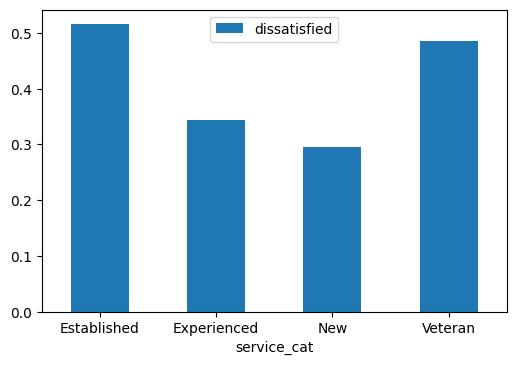

In [43]:
#Create a pivot table for dissatisfied employee's categories
dis_emp_cat = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

#Plot
dis_emp_cat_plot = dis_emp_cat.plot(kind='bar', rot=0).get_figure()
dis_emp_cat_plot.savefig('cat_plot.png')

The initial analysis indicates that employees later in their career stage are more likely to resign due to some kind of dissatisfaction.  Recall that the categories are as follows:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [34]:
# Check Age Values for Dissatisfaction
combined_updated.groupby('age')['dissatisfied'].value_counts()

age            dissatisfied
20 or younger  False            8
               True             2
21-25          False           43
               True            19
26-30          False           39
               True            28
31-35          False           38
               True            23
36-40          False           48
               True            25
41-45          False           58
               True            35
46-50          False           50
               True            31
51-55          False           41
               True            30
56 or older    False           23
               True             6
56-60          True            15
               False           11
61 or older    True            12
               False           11
nan            False           41
               True            14
Name: dissatisfied, dtype: int64

In [35]:
#Clean up age column to isolate values
combined_updated['age'] = combined_updated['age'].apply(str)
combined_updated['age'] = combined_updated['age'].str.replace('  ', '-')
combined_updated['age'].value_counts()
combined_updated.groupby('age')['dissatisfied'].value_counts()

age            dissatisfied
20 or younger  False            8
               True             2
21-25          False           43
               True            19
26-30          False           39
               True            28
31-35          False           38
               True            23
36-40          False           48
               True            25
41-45          False           58
               True            35
46-50          False           50
               True            31
51-55          False           41
               True            30
56 or older    False           23
               True             6
56-60          True            15
               False           11
61 or older    True            12
               False           11
nan            False           41
               True            14
Name: dissatisfied, dtype: int64

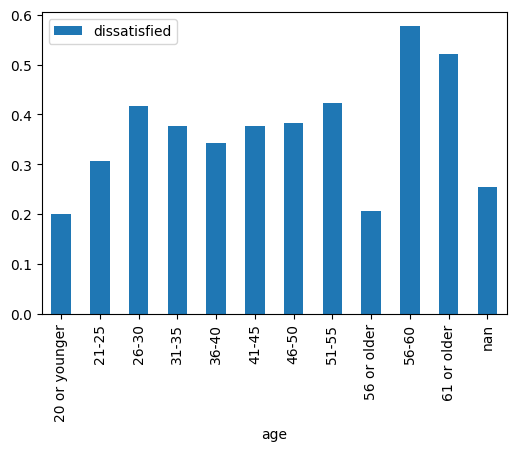

In [42]:
#Create pivot table to plot
dis_emp_age = combined_updated.pivot_table(index='age', values='dissatisfied')
dis_emp_age_plot = dis_emp_age.plot(kind='bar').get_figure()
dis_emp_age_plot.savefig('age_plot.png')

## Conclusion

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer? <br>

Employee's who have a longer tenure in an institution are more likely to leave due to some kind of dissatisfaction, as opposed to employee's who have worked during a shorter time 

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

It seems though that age isn't an indicator of job dissatisfaction, however on average, 1 in 3 of job surveys in any age indicate some kind of dissatisfaction.